In [20]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
train = pd.read_csv('train.csv', sep =',')
test = pd.read_csv('test.csv', sep = ',')

In [3]:
#train.info()
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#test.info()
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
num_features = train.select_dtypes(include=['int64', 'float64']).columns
cat_features = train.select_dtypes(include=['object']).columns

train[num_features] = train[num_features].fillna(train[num_features].median())
train[cat_features] = train[cat_features].fillna(train[cat_features].mode().iloc[0])

In [6]:
train = pd.get_dummies(train, columns = ['Neighborhood'])
test = pd.get_dummies(test, columns = ['Neighborhood'])

Aligning the dataframes

In [7]:
train, test = train.align(test, join='left', axis = 1)
test = test.fillna(0)

In [8]:
if 'SalePrice' in test.columns:
    test = test.drop(columns=['SalePrice'])

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

Defining Target and Features

In [9]:
features = ['TotalSF', 'OverallQual', 'GrLivArea'] + [col for col in train.columns if col.startswith('Neighborhood')]
X = train[features]
y = train['SalePrice']

split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

Linear Regression Model

In [10]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Evaluating Model using Mean Squared Error

In [11]:
predictions_lr = model_lr.predict(X_val)
mse_lr = mean_squared_error(y_val, predictions_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 45370.19387001515


Improved Model: Random Forest with Scaling

In [12]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

Evaluating the Random Forest Model

In [13]:
cv_scores_rf = cross_val_score(pipeline_rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_rf = np.sqrt(-cv_scores_rf)
print(f'Random Forest Cross-validated RMSE: {rmse_scores_rf.mean()}')

pipeline_rf.fit(X_train, y_train)
val_predictions_rf = pipeline_rf.predict(X_val)
val_rmse_rf = np.sqrt(mean_squared_error(y_val, val_predictions_rf))
print(f'Random Forest Validation RMSE: {val_rmse_rf}')

Random Forest Cross-validated RMSE: 32298.512175122618
Random Forest Validation RMSE: 33824.99066871563


Improved Model: Gradient Boosting Regressor with Scaling

In [14]:
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

Evaluating the Gradient Boosting Model

In [15]:
cv_scores_gb = cross_val_score(pipeline_gb, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gb = np.sqrt(-cv_scores_gb)
print(f'Gradient Boosting Cross-validated RMSE: {rmse_scores_gb.mean()}')


pipeline_gb.fit(X_train, y_train)
val_predictions_gb = pipeline_gb.predict(X_val)
val_rmse_gb = np.sqrt(mean_squared_error(y_val, val_predictions_gb))
print(f'Gradient Boosting Validation RMSE: {val_rmse_gb}')

Gradient Boosting Cross-validated RMSE: 30329.682303931855
Gradient Boosting Validation RMSE: 32613.419820403222


Improved Model: XGBoost Regressor with Scaling

In [16]:
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(n_estimators=100, random_state=42))
])

Evaluating the XGBoost Model

In [17]:
cv_scores_xgb = cross_val_score(pipeline_xgb, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_xgb = np.sqrt(-cv_scores_xgb)
print(f'XGBoost Cross-validated RMSE: {rmse_scores_xgb.mean()}')


pipeline_xgb.fit(X_train, y_train)
val_predictions_xgb = pipeline_xgb.predict(X_val)
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, val_predictions_xgb))
print(f'XGBoost Validation RMSE: {val_rmse_xgb}')

XGBoost Cross-validated RMSE: 34118.298615178
XGBoost Validation RMSE: 34292.252532357765


Based on the calculated RMSE values, the Gradient Boosting Regressor model performs the best with the lowest cross-validated RMSE and validation RMSE.

In [18]:
best_model = pipeline_gb

In [19]:
test_predictions = best_model.predict(test[features])

In [20]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission_py.csv', index=False)

Visualizations

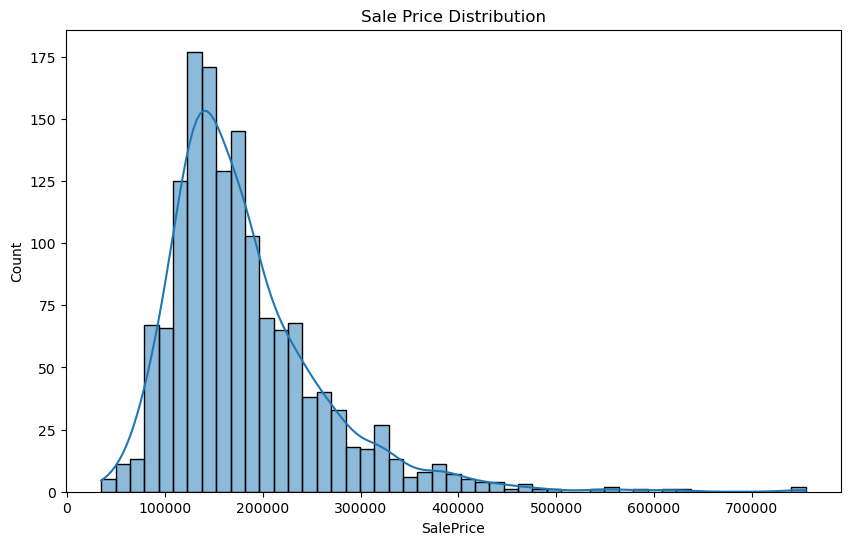

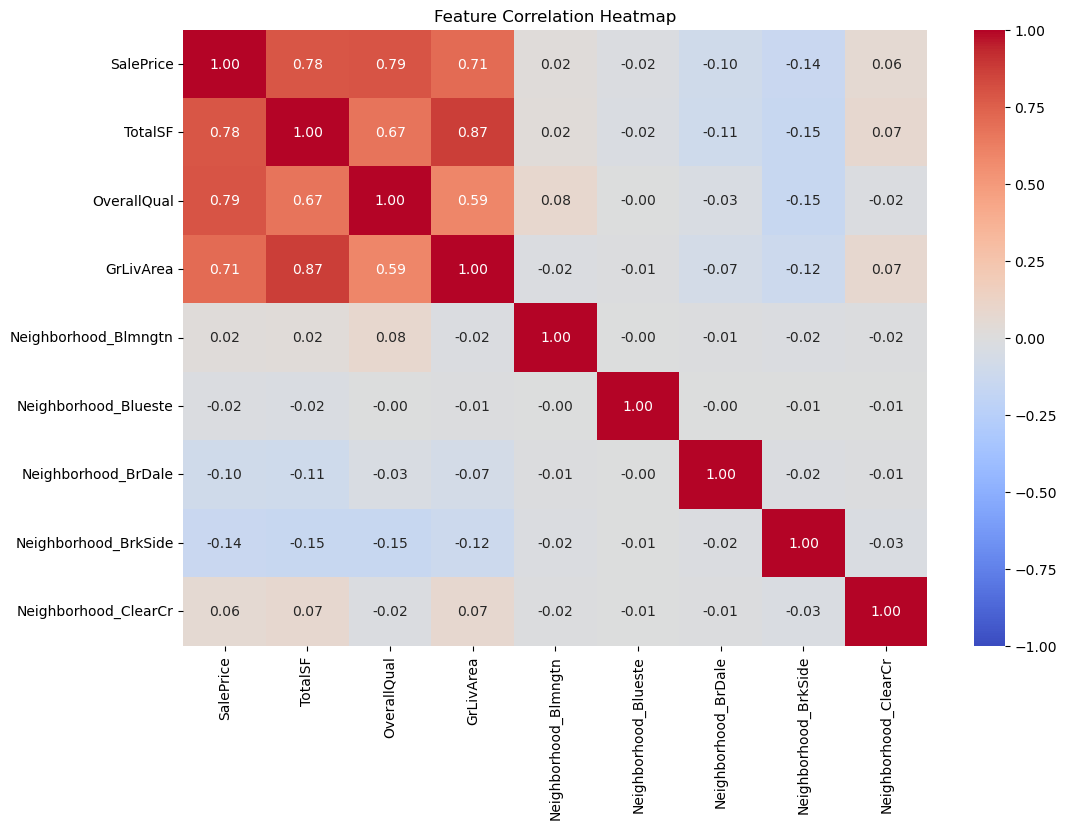

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.savefig('sale_price_distribution.png')

selected_features = ['SalePrice', 'TotalSF', 'OverallQual', 'GrLivArea'] + \
    [col for col in train.columns if col.startswith('Neighborhood')][:5] 

correlation_matrix = train[selected_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_correlation_heatmap.png')
plt.show()